<a href="https://colab.research.google.com/github/hmh10098/Introduction-to-TensorFlow-for-Artificial-Intelligence-Machine-Learning-and-Deep-Learning/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U

Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:01<00:00, 140MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U
To: /content/validation-horse-or-human.zip
100% 11.5M/11.5M [00:00<00:00, 69.6MB/s]


In [ ]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [ ]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse48-5.png', 'horse04-4.png', 'horse36-6.png', 'horse13-8.png', 'horse45-4.png', 'horse10-4.png', 'horse11-3.png', 'horse13-9.png', 'horse45-1.png', 'horse04-8.png']
['human03-28.png', 'human03-23.png', 'human13-10.png', 'human10-03.png', 'human12-15.png', 'human02-23.png', 'human04-08.png', 'human12-04.png', 'human09-15.png', 'human14-26.png']
['horse2-269.png', 'horse2-383.png', 'horse3-171.png', 'horse1-568.png', 'horse2-544.png', 'horse1-436.png', 'horse5-550.png', 'horse5-083.png', 'horse3-011.png', 'horse4-102.png']
['valhuman01-07.png', 'valhuman05-22.png', 'valhuman05-26.png', 'valhuman04-06.png', 'valhuman04-13.png', 'valhuman03-11.png', 'valhuman03-24.png', 'valhuman05-14.png', 'valhuman04-15.png', 'valhuman01-14.png']


In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


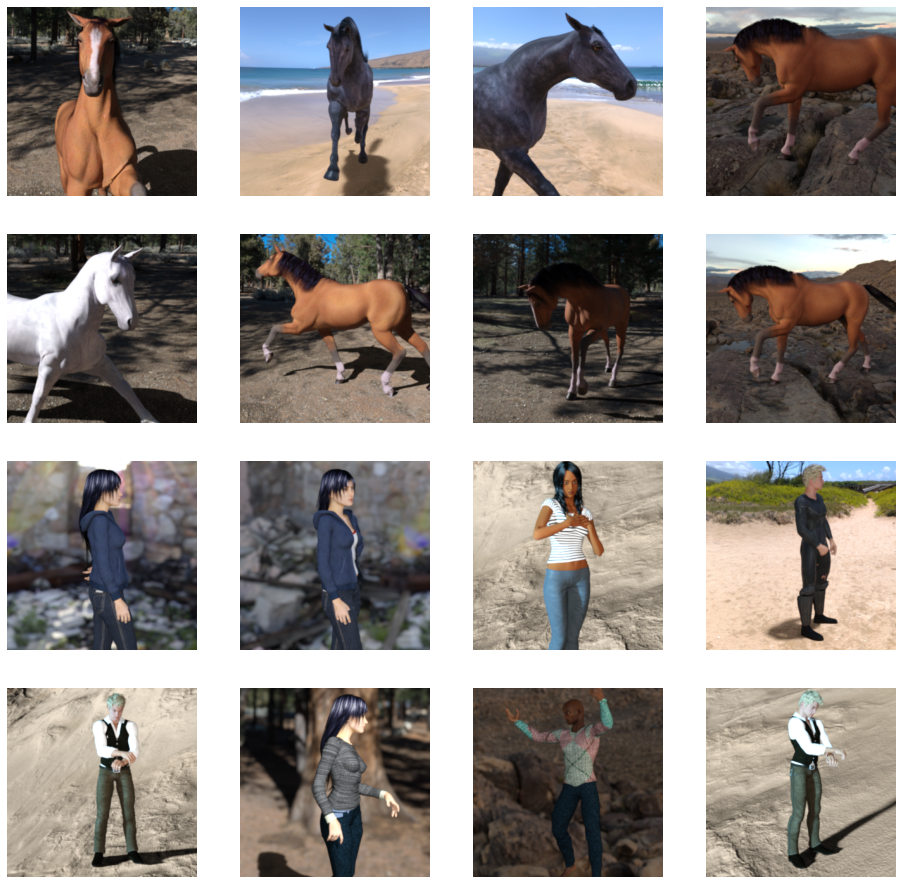

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
model = keras.Sequential([keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
                          keras.layers.MaxPooling2D(2, 2),
                          keras.layers.Conv2D(32, (3,3), activation='relu'),
                          keras.layers.MaxPooling2D(2, 2),
                          keras.layers.Conv2D(64, (3,3), activation='relu'),
                          keras.layers.MaxPooling2D(2, 2),
                          keras.layers.Conv2D(64, (3,3), activation='relu'),
                          keras.layers.MaxPooling2D(2, 2),
                          keras.layers.Conv2D(64, (3,3), activation='relu'),
                          keras.layers.MaxPooling2D(2, 2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(512, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 35, 35, 64)      

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, log={}):
    if log.get('accuracy')>0.998:
      print('\nReached 99% accuracy so cancelling training!')
      self.model.stop_training=True

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
  '/content/horse-or-human',
  target_size=(300, 300),
  batch_size = 128,
  class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/', 
        target_size=(300, 300),  
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
callback = myCallback()
history = model.fit(
      train_generator,
      steps_per_epoch=9,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      callbacks = [callback])

Epoch 1/15
9/9 [==============================] - 11s 1s/step - loss: 0.9237 - accuracy: 0.5463 - val_loss: 0.6100 - val_accuracy: 0.6914
Epoch 2/15
9/9 [==============================] - 9s 921ms/step - loss: 0.7374 - accuracy: 0.7050 - val_loss: 0.7462 - val_accuracy: 0.5000
Epoch 3/15
9/9 [==============================] - 9s 957ms/step - loss: 0.5163 - accuracy: 0.7264 - val_loss: 0.7122 - val_accuracy: 0.8086
Epoch 4/15
9/9 [==============================] - 9s 933ms/step - loss: 0.3030 - accuracy: 0.8783 - val_loss: 2.4675 - val_accuracy: 0.6484
Epoch 5/15
9/9 [==============================] - 9s 962ms/step - loss: 0.2244 - accuracy: 0.9114 - val_loss: 0.9430 - val_accuracy: 0.8438
Epoch 6/15
9/9 [==============================] - 9s 956ms/step - loss: 0.3734 - accuracy: 0.8520 - val_loss: 1.5456 - val_accuracy: 0.8086
Epoch 7/15
9/9 [==============================] - 10s 1s/step - loss: 0.1465 - accuracy: 0.9396 - val_loss: 1.9364 - val_accuracy: 0.8086
Epoch 8/15
9/9 [========

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

(1, 300, 300, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


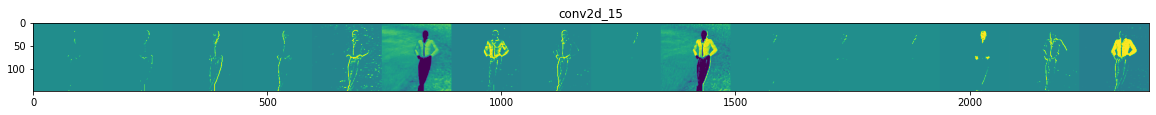

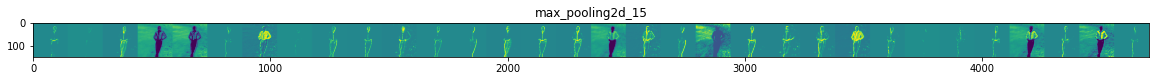

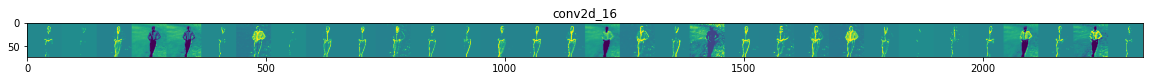

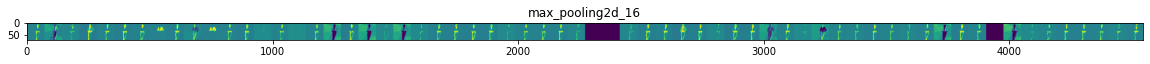

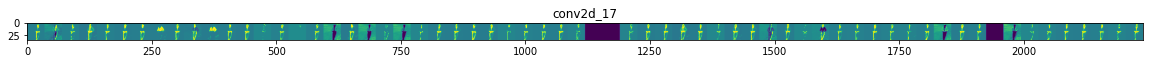

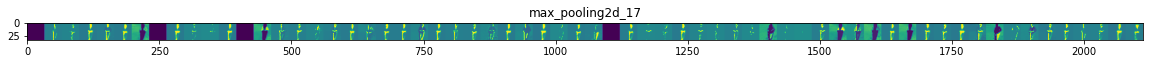

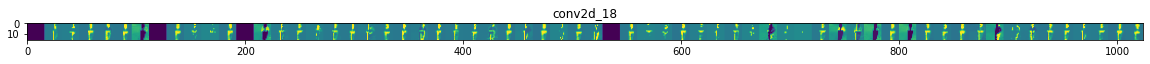

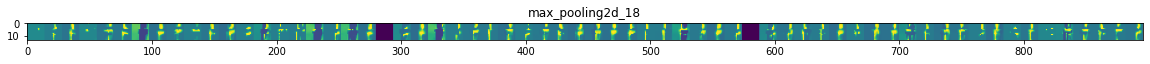

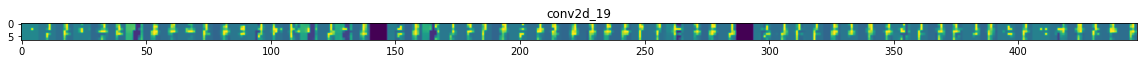

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
print(x.shape)
# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[0:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Excercise